In [83]:
# dataset taken from :
from IPython.core.display import display, HTML
display(HTML("""<a href="https://www.kaggle.com/c/facial-keypoints-detection/overview">Facial key points detection dataset (from Kaggle)</a>"""))
display(HTML("""<a href="https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data">Facial expression recognition dataset (from Kaggle)</a>"""))

In [84]:
# Part 1: Facial key points detection.

In [85]:
# Importing the packages:

import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [86]:
# Loading facial key points data:
key_facial_df=pd.read_csv('data.csv')

In [87]:
key_facial_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [88]:
key_facial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [89]:
key_facial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [90]:
key_facial_df.shape

(2140, 31)

In [91]:
key_facial_df['Image']=key_facial_df['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape(96,96))

In [92]:
key_facial_df['Image'][0].shape

(96, 96)

In [93]:
key_facial_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[[238, 236, 237, 238, 240, 240, 239, 241, 241,..."
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,"[[219, 215, 204, 196, 204, 211, 212, 200, 180,..."
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,"[[144, 142, 159, 180, 188, 188, 184, 180, 167,..."
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,"[[193, 192, 193, 194, 194, 194, 193, 192, 168,..."
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,"[[147, 148, 160, 196, 215, 214, 216, 217, 219,..."


In [94]:
key_facial_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,22.361617,38.034571,56.147991,29.222304,79.617523,29.656570,39.272084,29.413747,15.761707,30.452947,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,2.768804,2.654903,2.819914,2.867131,3.312647,3.627187,2.609648,2.842219,3.337901,3.644342,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,11.054589,26.521633,35.581733,15.859361,55.549929,10.522325,25.060327,16.476000,3.826243,13.224453,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,20.631964,36.569765,54.562757,27.590944,77.732395,27.658656,37.555192,27.798773,13.540535,28.268263,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,22.529600,37.876900,56.239984,29.468466,79.797607,29.753523,39.247681,29.528098,15.760876,30.333323,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,24.202338,39.401034,57.926361,31.079433,81.559651,31.763791,40.824154,31.134740,17.871569,32.661300,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,40.050971,50.002113,67.752000,40.293408,94.269957,48.823425,51.300571,39.445859,39.676082,44.857962,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


In [95]:
# Performing image visualization:

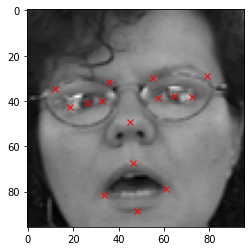

In [96]:
# choosing a random image:
i=np.random.randint(1,len(key_facial_df))
plt.imshow(key_facial_df['Image'][i], cmap='gray')

# plotting the key facial points:
for j in range(1,31,2):
    plt.plot(key_facial_df.loc[i][j-1], key_facial_df.loc[i][j], 'rx')

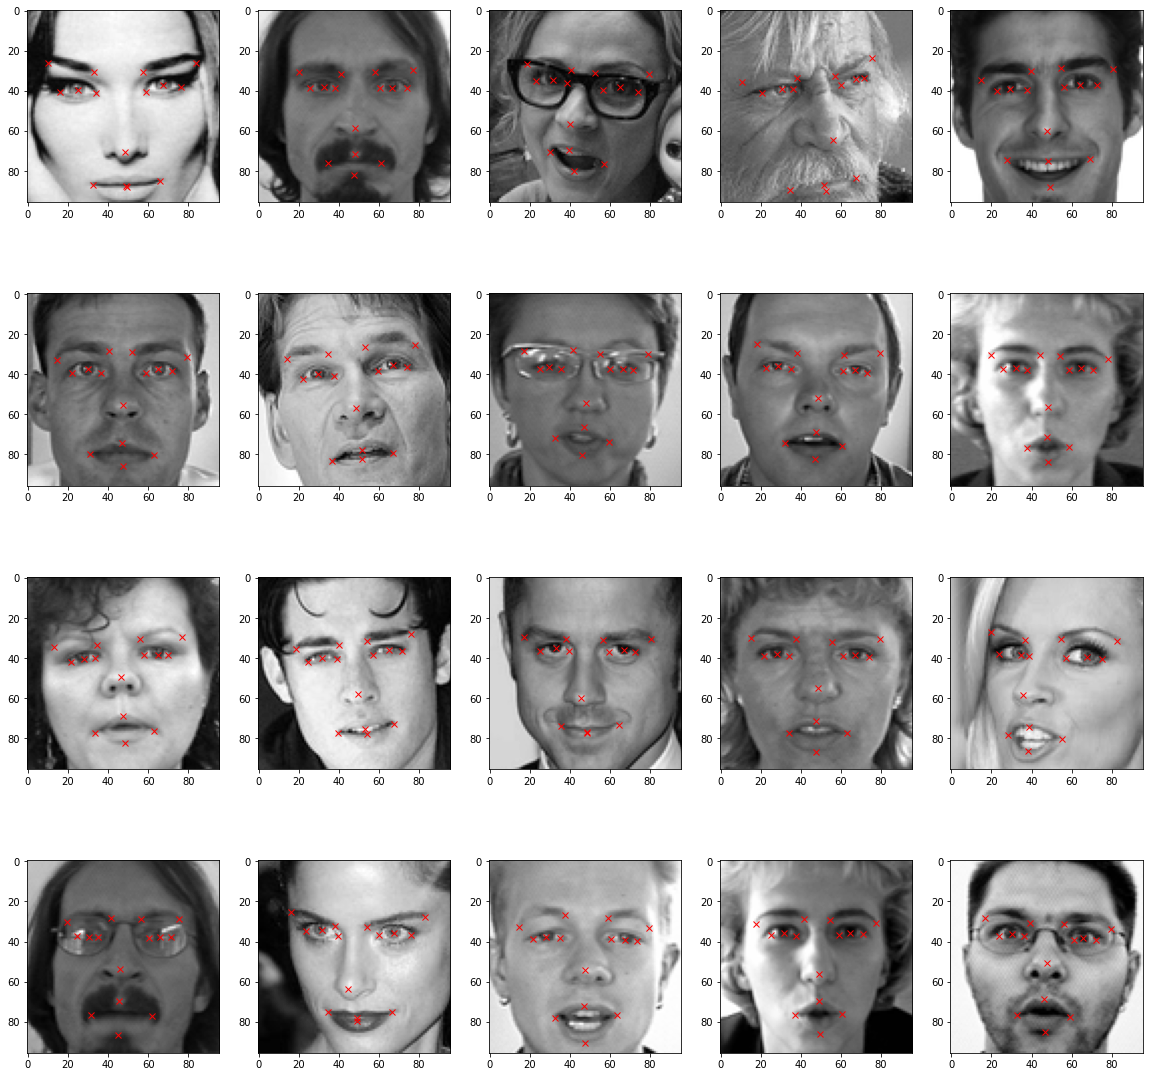

In [97]:
# Showing random 20 images in a grid format:
fig=plt.figure(figsize=(20,20))

for i in range(20):
    ax=fig.add_subplot(4,5,i+1)
    k=np.random.randint(1,len(key_facial_df))
    image=plt.imshow(key_facial_df['Image'][k], cmap='gray')
    for j in range(1,31,2):
        plt.plot(key_facial_df.loc[k][j-1], key_facial_df.loc[k][j], 'rx')

In [98]:
# Performing image augmentation:

In [99]:
import copy
key_facial_df_copy=copy.copy(key_facial_df)
key_facial_df_copy.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[[238, 236, 237, 238, 240, 240, 239, 241, 241,..."
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,"[[219, 215, 204, 196, 204, 211, 212, 200, 180,..."
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,"[[144, 142, 159, 180, 188, 188, 184, 180, 167,..."
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,"[[193, 192, 193, 194, 194, 194, 193, 192, 168,..."
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,"[[147, 148, 160, 196, 215, 214, 216, 217, 219,..."


In [100]:
columns=key_facial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [101]:
# Horizontal image flipping:
key_facial_df_copy['Image']=key_facial_df_copy['Image'].apply(lambda x: np.flip(x, axis=1))

for i in range(len(columns)):
    if i%2==0:
        key_facial_df_copy[columns[i]]=key_facial_df_copy[columns[i]].apply(lambda x: 96. - float(x))

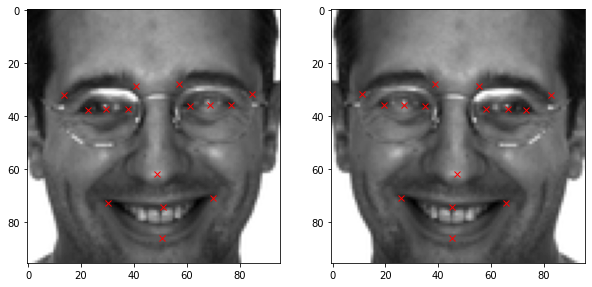

In [102]:
# Comparison between the horizontally flipped image and original one:

i=np.random.randint(1,len(key_facial_df_copy))
fig=plt.figure(figsize=(10,10))

ax1=fig.add_subplot(1,2,1)
ax1.imshow(key_facial_df_copy['Image'][i], cmap='gray')
for j in range(1,31,2):
    ax1.plot(key_facial_df_copy.loc[i][j-1],key_facial_df_copy.loc[i][j], 'rx')
   
ax2=fig.add_subplot(1,2,2)
ax2.imshow(key_facial_df['Image'][i], cmap='gray')
for j in range(1,31,2):
    ax2.plot(key_facial_df.loc[i][j-1],key_facial_df.loc[i][j], 'rx')

In [103]:
augmented_df=np.concatenate((key_facial_df,key_facial_df_copy))

In [104]:
augmented_df.shape

(4280, 31)

In [105]:
# Vertical image flipping:
key_facial_df_copy=copy.copy(key_facial_df)

key_facial_df_copy['Image']=key_facial_df_copy['Image'].apply(lambda x: np.flip(x, axis=0))

for i in range(len(columns)):
    if i%2!=0:
        key_facial_df_copy[columns[i]]=key_facial_df_copy[columns[i]].apply(lambda x: 96. - float(x))

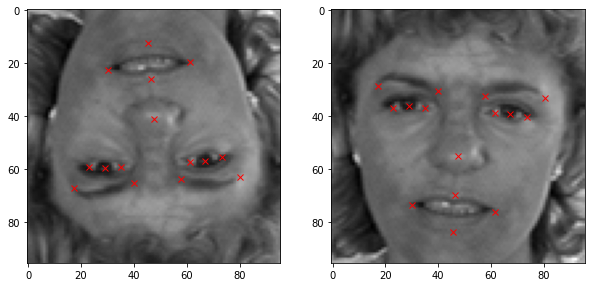

In [106]:
# Comparison between the vertically flipped image and original one:

i=np.random.randint(1,len(key_facial_df_copy))
fig=plt.figure(figsize=(10,10))

ax1=fig.add_subplot(1,2,1)
ax1.imshow(key_facial_df_copy['Image'][i], cmap='gray')
for j in range(1,31,2):
    ax1.plot(key_facial_df_copy.loc[i][j-1],key_facial_df_copy.loc[i][j], 'rx')
   
ax2=fig.add_subplot(1,2,2)
ax2.imshow(key_facial_df['Image'][i], cmap='gray')
for j in range(1,31,2):
    ax2.plot(key_facial_df.loc[i][j-1],key_facial_df.loc[i][j], 'rx')

In [107]:
augmented_df=np.concatenate((augmented_df, key_facial_df_copy))

In [108]:
augmented_df.shape

(6420, 31)

In [109]:
# Augmentation by increased brigthness:
import random
key_facial_df_copy=copy.copy(key_facial_df)

key_facial_df_copy['Image']=key_facial_df_copy['Image'].apply(lambda x: np.clip(random.uniform(1.5,2.0)*x ,0.0 ,255.0 ))

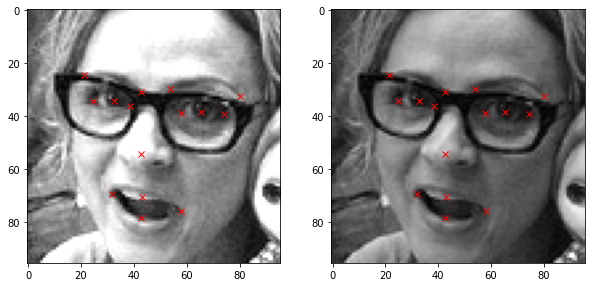

In [110]:
# Comparison between the brightness increased image and original one:

i=np.random.randint(1,len(key_facial_df_copy))
fig=plt.figure(figsize=(10,10))

ax1=fig.add_subplot(1,2,1)
ax1.imshow(key_facial_df_copy['Image'][i], cmap='gray')
for j in range(1,31,2):
    ax1.plot(key_facial_df_copy.loc[i][j-1],key_facial_df_copy.loc[i][j], 'rx')
   
ax2=fig.add_subplot(1,2,2)
ax2.imshow(key_facial_df['Image'][i], cmap='gray')
for j in range(1,31,2):
    ax2.plot(key_facial_df.loc[i][j-1],key_facial_df.loc[i][j], 'rx')

In [111]:
augmented_df=np.concatenate((augmented_df, key_facial_df_copy))

In [112]:
augmented_df.shape

(8560, 31)

In [113]:
# Image normalization and preparing the training set:

# Selecting the 31st column values:
img=augmented_df[:,30]
img=img/255

X=np.empty((len(img),96,96,1))

In [114]:
for i in range(len(img)):
    X[i,]=np.expand_dims(img[i], axis=2)
    
X=np.asarray(X).astype(np.float32)
X.shape

(8560, 96, 96, 1)

In [115]:
y=augmented_df[:, :30]

y=np.asarray(y).astype(np.float32)
y.shape

(8560, 30)

In [116]:
# Splitting the dataset into train and test sets:
from sklearn import model_selection
X_train, X_test, y_train, y_test=model_selection.train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6848, 96, 96, 1), (1712, 96, 96, 1), (6848, 30), (1712, 30))

In [117]:
# Building a resnet:

def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a')(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b')(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c')(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy')(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a')(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b')(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c')(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a')(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b')(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c')(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [118]:
# Making the model:

input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1')(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128,128,512], stage= 3)


# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


Facial_key_points_model_1 = Model( inputs= X_input, outputs = X)
Facial_key_points_model_1.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 102, 102, 1)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

In [119]:
# Callbacks:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
earlystop=EarlyStopping(patience=500)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy',
                                          patience=100,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr=0.000000000001)

In [120]:
# Save the best model with the least validation loss:
checkpointer = ModelCheckpoint(filepath = "Facial_key_points_model_1_weights.hdf5", verbose=1, save_best_only=True)

callbacks=[earlystop, learning_rate_reduction, checkpointer]

In [121]:
# Compiling the model:
adam=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
Facial_key_points_model_1.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])

In [122]:
# Fit the model:
history = Facial_key_points_model_1.fit(X_train, y_train, batch_size = 32, epochs = 500, validation_split = 0.20, callbacks=callbacks)

Epoch 1/500
172/172 [==============================] - ETA: 0s - loss: 168.7712 - accuracy: 0.5962
Epoch 00001: val_loss improved from inf to 627.39417, saving model to Facial_key_points_model_1_weights.hdf5
172/172 [==============================] - 9s 53ms/step - loss: 168.7712 - accuracy: 0.5962 - val_loss: 627.3942 - val_accuracy: 0.6409
Epoch 2/500
171/172 [============================>.] - ETA: 0s - loss: 78.2446 - accuracy: 0.7217
Epoch 00002: val_loss improved from 627.39417 to 150.60147, saving model to Facial_key_points_model_1_weights.hdf5
172/172 [==============================] - 9s 50ms/step - loss: 78.2533 - accuracy: 0.7216 - val_loss: 150.6015 - val_accuracy: 0.7204
Epoch 3/500
171/172 [============================>.] - ETA: 0s - loss: 62.7394 - accuracy: 0.7189
Epoch 00003: val_loss improved from 150.60147 to 91.09139, saving model to Facial_key_points_model_1_weights.hdf5
172/172 [==============================] - 9s 50ms/step - loss: 62.7006 - accuracy: 0.7189 - val

In [123]:
# Testing the model:
result= Facial_key_points_model_1.evaluate(X_test, y_test)
print('Accuracy: {}'.format(result[1]))

54/54 [==============================] - 1s 16ms/step - loss: 37.3587 - accuracy: 0.8516
Accuracy: 0.8516355156898499


In [124]:
# Getting the model keys:
history.history.keys()
print(max(history.history['loss']))
print(max(history.history['accuracy']))
print(max(history.history['val_loss']))
print(max(history.history['val_accuracy']))

168.7711944580078
0.9222344160079956
627.3941650390625
0.8503649830818176


In [125]:
# Saving the model architecture:
model_json= Facial_key_points_model_1.to_json()
with open('Facial_key_points_model_1.json','w') as json_file:
  json_file.write(model_json)

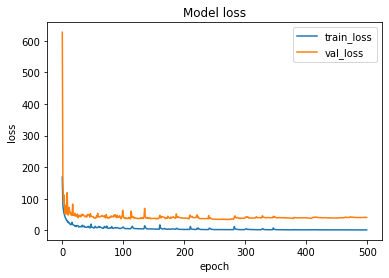

In [126]:
# Plot at training artifacts:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [166]:
# Part 2: Facial expression recognition:

In [167]:
# Importing and exploring the dataset:
facial_expression_df=pd.read_csv('icml_face_data.csv')

In [168]:
facial_expression_df

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
...,...,...
24563,3,0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564,0,181 177 176 156 178 144 136 132 122 107 131 16...
24565,3,178 174 172 173 181 188 191 194 196 199 200 20...
24566,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...


In [169]:
facial_expression_df[' pixels'][0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [170]:
def string2array(x):
    return np.array(x.split(' ')).reshape(48,48,1).astype('float32')

In [171]:
facial_expression_df[' pixels']=facial_expression_df[' pixels'].apply(lambda x: string2array(x))

In [172]:
import cv2
def resize(x):
    img=x.reshape(48,48)
    return cv2.resize(img, dsize=(96,96), interpolation = cv2.INTER_CUBIC)

In [173]:
facial_expression_df[' pixels']=facial_expression_df[' pixels'].apply(lambda x: resize(x))

In [174]:
facial_expression_df

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
3,2,"[[20.083221, 19.079437, 17.398712, 17.158691, ..."
4,3,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."
...,...,...
24563,3,"[[-4.901001, 5.6496277, 22.477203, 49.366516, ..."
24564,0,"[[181.71645, 179.72063, 176.40785, 175.93037, ..."
24565,3,"[[178.1166, 176.83118, 174.74146, 172.61276, 1..."
24566,0,"[[16.883408, 16.953583, 17.081573, 16.53476, 1..."


In [175]:
facial_expression_df[' pixels'][0].shape

(96, 96)

In [176]:
facial_expression_df.shape

(24568, 2)

In [177]:
facial_expression_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [178]:
label={0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

In [179]:
# Image visualization:

In [180]:
facial_expression_df.emotion.value_counts().index

Int64Index([3, 2, 0, 4, 1], dtype='int64')

In [181]:
facial_expression_df.emotion.value_counts()

3    8989
2    6077
0    4953
4    4002
1     547
Name: emotion, dtype: int64

Text(0.5, 1.0, 'surprise')

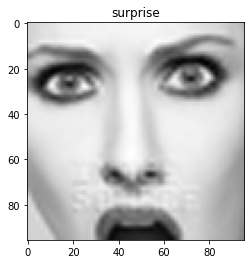

In [182]:
# Showing a random image with emotion:
i=np.random.randint(0,len(facial_expression_df))

plt.imshow(facial_expression_df[' pixels'][i], cmap='gray')
plt.title(label[facial_expression_df['emotion'][i]])

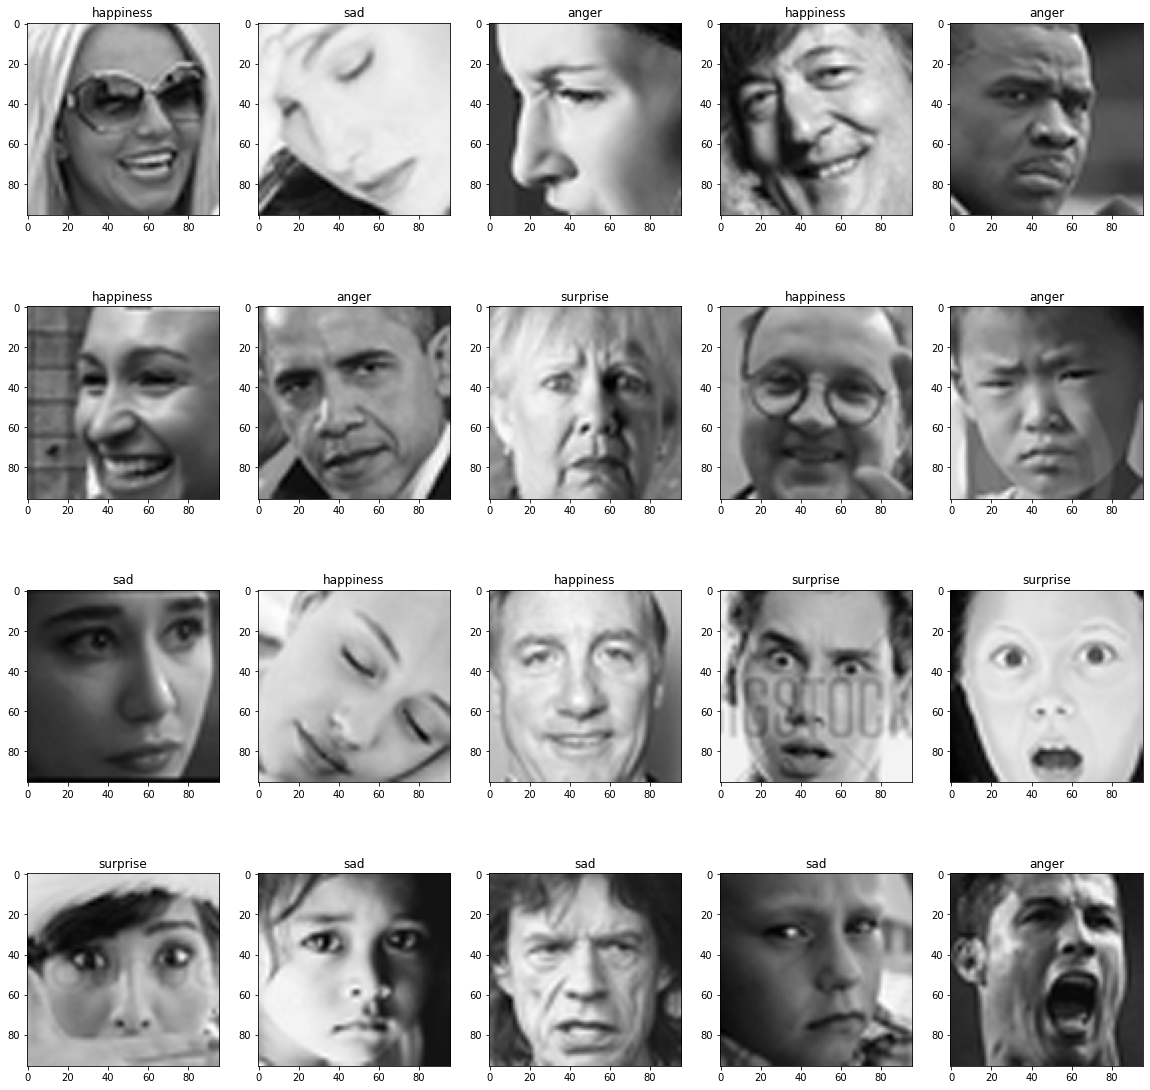

In [183]:
# Showing 20 random images in a plot:
fig=plt.figure(figsize=(20,20))

for i in range(20):
    ax=fig.add_subplot(4,5,i+1)
    k=np.random.randint(0,len(facial_expression_df))
    plt.imshow(facial_expression_df[' pixels'][k], cmap='gray')
    plt.title(label[facial_expression_df['emotion'][k]])

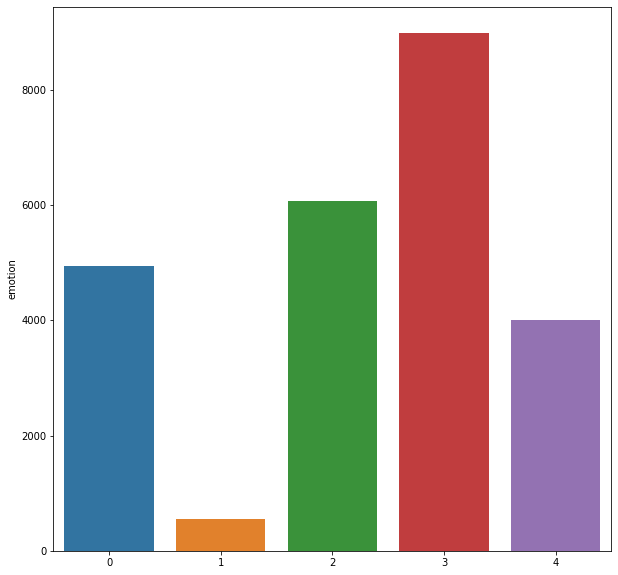

In [184]:
plt.figure(figsize = (10,10))
sns.barplot(x = facial_expression_df.emotion.value_counts().index, y = facial_expression_df.emotion.value_counts())

In [185]:
# Data preparation and Image augmentation:

In [186]:
# Spliting the dataframe into features and labels:
from keras.utils import to_categorical
X=facial_expression_df[' pixels']
y=to_categorical(facial_expression_df['emotion'])

In [187]:
X[0]

array([[ 69.316925,  73.03865 ,  79.13719 , ...,  40.73619 ,  40.6584  ,
         40.5394  ],
       [ 68.66325 ,  70.95224 ,  74.71768 , ...,  43.274765,  42.037186,
         41.223618],
       [ 67.768814,  67.71646 ,  67.67172 , ...,  47.39473 ,  44.26329 ,
         42.31465 ],
       ...,
       [ 74.89021 ,  76.79553 ,  79.90259 , ...,  71.463425,  59.32875 ,
         51.74736 ],
       [ 76.68126 ,  75.808105,  74.25452 , ...,  93.943375,  79.77934 ,
         71.13246 ],
       [ 77.63858 ,  75.15074 ,  70.8846  , ..., 107.66351 ,  92.23212 ,
         82.91585 ]], dtype=float32)

In [188]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [189]:
X=np.stack(X, axis=0)
X=X.reshape(24568, 96, 96, 1)
print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [190]:
# Spliting the dataframe into test, train, and validation:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, shuffle=True)
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.30, shuffle=True)

In [191]:
print(X_train.shape, X_val.shape, X_test.shape)

(13757, 96, 96, 1) (5897, 96, 96, 1) (4914, 96, 96, 1)


In [192]:
print(y_train.shape, y_val.shape, y_test.shape)

(13757, 5) (5897, 5) (4914, 5)


In [193]:
# Image processing:
X_train/=255
X_val/=255
X_test/=255

In [194]:
X_train[0]

array([[[0.9882353 ],
        [0.9882353 ],
        [0.9882353 ],
        ...,
        [0.9882353 ],
        [0.9882353 ],
        [0.9882353 ]],

       [[0.9882353 ],
        [0.9882353 ],
        [0.9882353 ],
        ...,
        [0.9882353 ],
        [0.9882353 ],
        [0.9882353 ]],

       [[0.9882353 ],
        [0.9882353 ],
        [0.9882353 ],
        ...,
        [0.9882353 ],
        [0.9882353 ],
        [0.9882353 ]],

       ...,

       [[0.55667585],
        [0.5838057 ],
        [0.6289729 ],
        ...,
        [0.60326463],
        [0.49225494],
        [0.42359614]],

       [[0.6142788 ],
        [0.6035268 ],
        [0.58675647],
        ...,
        [0.7834616 ],
        [0.75492954],
        [0.7376863 ]],

       [[0.65072584],
        [0.6173878 ],
        [0.56370497],
        ...,
        [0.8935509 ],
        [0.9136393 ],
        [0.9267102 ]]], dtype=float32)

In [195]:
#  Data augmentation:
train_datagen=ImageDataGenerator(rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip=True,
    fill_mode = "nearest")

In [196]:
# Building the model:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

Facial_expression_model_2 = Model( inputs= X_input, outputs = X, name = 'Resnet18')

Facial_expression_model_2.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 102, 102, 1)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [197]:
# Compiling the model:
Facial_expression_model_2.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [198]:
# Callbacks:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
earlystop=EarlyStopping(patience=500)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy',
                                          patience=20,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr=0.000000001)

In [199]:
# Save the best model with the least validation loss:
checkpointer = ModelCheckpoint(filepath = "Facial_expression_model_2_weights.hdf5", verbose=1, save_best_only=True)

callbacks=[earlystop, learning_rate_reduction, checkpointer]

In [200]:
history= Facial_expression_model_2.fit(train_datagen.flow(X_train, y_train, batch_size=64),
                                       validation_data=(X_val, y_val), steps_per_epoch=len(X_train)//64,
                                       epochs=500, callbacks=callbacks)

Epoch 1/500
214/214 [==============================] - ETA: 0s - loss: 1.4419 - accuracy: 0.4028
Epoch 00001: val_loss improved from inf to 1.56442, saving model to Facial_expression_model_2_weights.hdf5
214/214 [==============================] - 23s 106ms/step - loss: 1.4419 - accuracy: 0.4028 - val_loss: 1.5644 - val_accuracy: 0.1993
Epoch 2/500
214/214 [==============================] - ETA: 0s - loss: 1.1573 - accuracy: 0.5209
Epoch 00002: val_loss did not improve from 1.56442
214/214 [==============================] - 22s 102ms/step - loss: 1.1573 - accuracy: 0.5209 - val_loss: 1.5689 - val_accuracy: 0.3768
Epoch 3/500
214/214 [==============================] - ETA: 0s - loss: 1.0310 - accuracy: 0.5845
Epoch 00003: val_loss improved from 1.56442 to 1.38393, saving model to Facial_expression_model_2_weights.hdf5
214/214 [==============================] - 22s 104ms/step - loss: 1.0310 - accuracy: 0.5845 - val_loss: 1.3839 - val_accuracy: 0.3743
Epoch 4/500
214/214 [=================

KeyboardInterrupt: ignored

In [201]:
# Predicting the scores:
score=Facial_expression_model_2.evaluate(X_test, y_test)
print('Test accuracy {}'.format(score[1]))

185/185 [==============================] - 3s 14ms/step - loss: 0.9624 - accuracy: 0.8026
Test accuracy 0.8026114702224731


In [202]:
# Saving the model architecture:
model_json = Facial_expression_model_2.to_json()
with open("Facial_expression_model_2.json","w") as json_file:
  json_file.write(model_json)

In [203]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [204]:
print(max(history.history['loss']))
print(max(history.history['accuracy']))
print(max(history.history['val_loss']))
print(max(history.history['val_accuracy']))

168.7711944580078
0.9222344160079956
627.3941650390625
0.8503649830818176


In [205]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

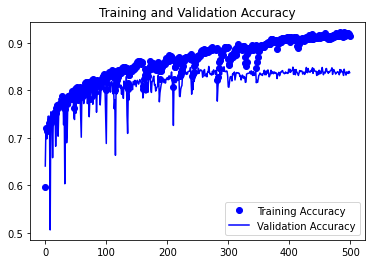

In [206]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

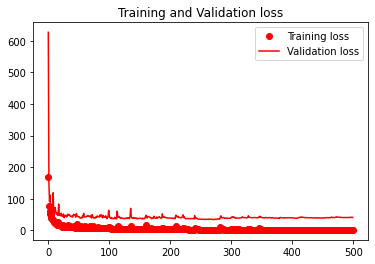

In [207]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [208]:
# predicted_classes = model.predict_classes(X_test)
predicted_classes = np.argmax(Facial_expression_model_2.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

In [209]:
y_true.shape

(4914,)

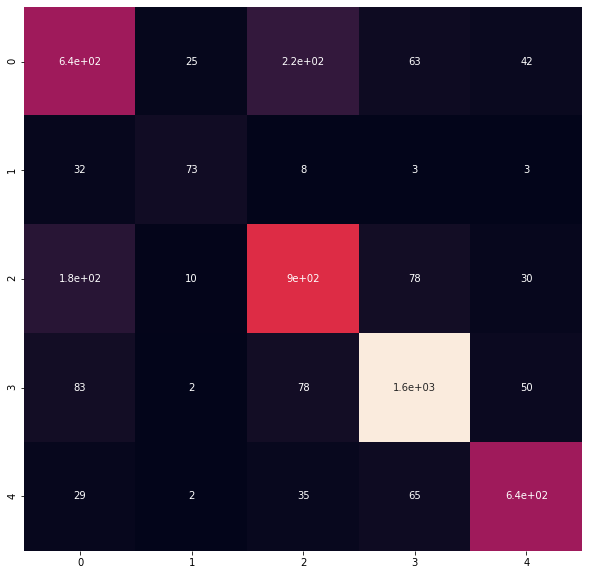

In [210]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

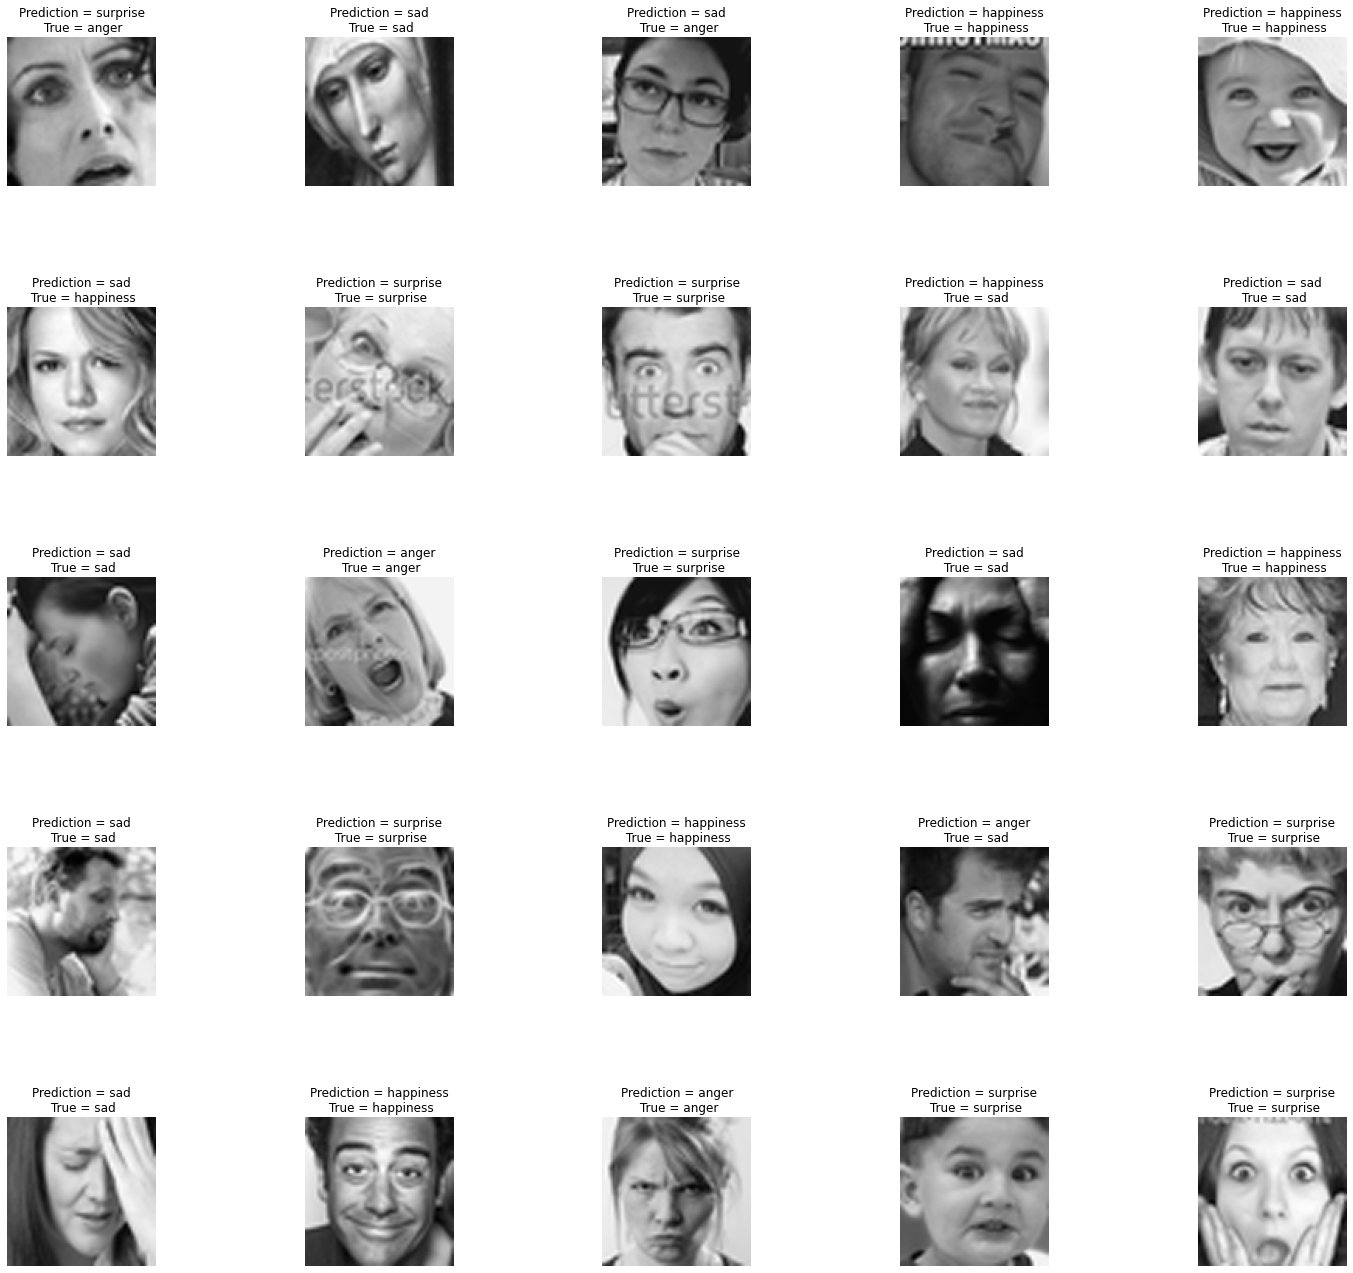

In [211]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(label[predicted_classes[i]], label[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

In [212]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       993
           1       0.65      0.61      0.63       119
           2       0.73      0.75      0.74      1196
           3       0.89      0.88      0.88      1833
           4       0.84      0.83      0.83       773

    accuracy                           0.79      4914
   macro avg       0.75      0.75      0.75      4914
weighted avg       0.79      0.79      0.79      4914



In [213]:
# Loading the model 1:
with open('Facial_key_points_model_1.json', 'r') as json_file:
    json_savedModel_1= json_file.read()
    
# load the model architecture 
Facial_key_points_model_1 = tf.keras.models.model_from_json(json_savedModel_1)
Facial_key_points_model_1.load_weights('Facial_key_points_model_1_weights.hdf5')
Facial_key_points_model_1.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [214]:
# Loading the model 2:
with open('Facial_expression_model_2.json', 'r') as json_file:
    json_savedModel_2= json_file.read()
    
# load the model architecture 
Facial_expression_model_2 = tf.keras.models.model_from_json(json_savedModel_2)
Facial_expression_model_2.load_weights('Facial_expression_model_2_weights.hdf5')
Facial_expression_model_2.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [215]:
# Combining both the model into one prediction:
def predict(X_test):

  # Making prediction from the keypoint model
  df_predict = Facial_key_points_model_1.predict(X_test)

  # Making prediction from the emotion model
  df_emotion = np.argmax(Facial_expression_model_2.predict(X_test), axis=-1)

  # Reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Converting the predictions into a dataframe
  df_predict = pd.DataFrame(df_predict, columns= columns)

  # Adding emotion into the predicted dataframe
  df_predict['emotion'] = df_emotion

  return df_predict

In [216]:
df_predict = predict(X_test)

In [217]:
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,emotion
0,38.942902,41.722214,60.343174,41.960316,44.625301,42.740852,34.203140,43.449760,56.617981,42.519028,64.863953,43.594421,47.876831,29.844244,29.773170,33.549168,56.627060,30.214579,66.939461,32.903706,58.081779,57.666477,45.372757,86.235512,61.705635,86.132347,56.195187,81.686714,56.281158,88.990242,4
1,74.545593,61.237854,32.007309,59.916382,67.153419,60.463196,82.272285,60.714417,40.105408,59.471603,23.856949,58.867714,65.547531,65.349716,89.876961,64.255486,43.756115,64.085556,15.859032,62.632080,55.689156,51.809288,70.675552,41.135429,34.252804,39.943714,53.269855,42.569454,53.364574,38.360218,2
2,32.350414,35.091595,64.329323,39.237675,38.966663,37.144867,25.637989,34.872425,57.896667,39.571194,70.932091,40.911720,42.829926,29.129122,20.984947,26.430561,57.337910,31.769608,77.497231,33.517521,47.140617,55.426254,29.580124,70.959198,56.940350,74.750610,43.827789,71.063072,43.272339,76.594887,3
3,60.541576,52.705894,31.816719,56.136040,55.179367,52.732613,66.824669,50.883911,38.564148,54.725471,25.245043,55.693718,58.482674,61.475243,71.801888,57.078712,40.663185,63.656700,20.564011,62.089703,54.268524,42.077316,60.115826,23.797575,30.269859,26.598448,47.504520,27.981457,47.144150,18.712755,3
4,65.499107,39.832088,37.541367,40.063862,59.911854,41.109512,71.536079,40.420429,43.720085,41.228947,31.357109,40.926147,58.940102,32.808201,75.923119,32.326035,44.923115,32.805504,26.454166,33.219555,53.011902,60.216873,65.750854,76.187958,39.426819,76.646164,53.024315,75.302437,53.399212,82.544144,3


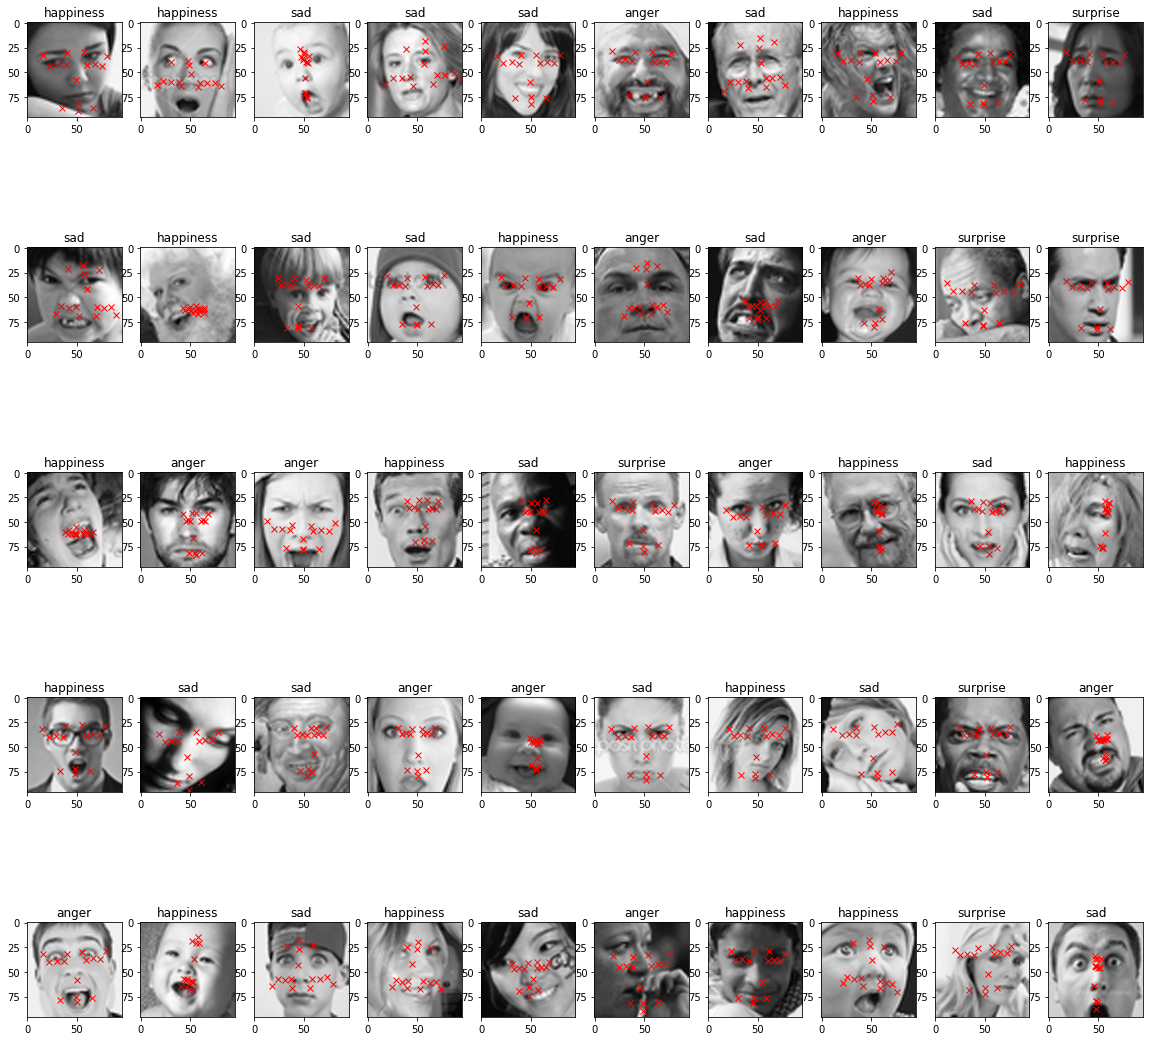

In [219]:
# Plotting the test images and their predicted keypoints and emotions
fig=plt.figure(figsize=(20,20))

for i in range(50):
    ax=fig.add_subplot(5,10,i+1)
    k=np.random.randint(0,len(df_predict))
    plt.imshow(facial_expression_df[' pixels'][k], cmap='gray')
    plt.title(label[df_predict['emotion'][k]])
    for j in range(1,31,2):
        plt.plot(df_predict.loc[k][j-1],df_predict.loc[i][j], 'rx')